In [1]:
import scripts.init_gpu as init_gpu
import scripts.init_dataset as init_dataset
import pandas as pd
init_gpu.initialize_gpus()

locations = ['LOC2', 'LOC3']

print("Loading Dataset...")
# load the dataset
df = pd.read_csv(
    f"../dataset/processed/{locations[0]}-{locations[1]}-scaled-balanced.csv")

length = len(df.columns) - 2  # subtract the two label columns

# get train-test set
train_df, test_df, train_web_samples, test_web_samples = init_dataset.get_sample(
    df, locations, range(1500), 1200)

train_df.head()

2024-12-05 15:44:52.510589: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 15:44:52.517753: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733373892.526018  678668 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733373892.528489  678668 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 15:44:52.537052: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Num GPUs Available:  2
Loading Dataset...
Training Websites: [1309, 228, 51, 563, 501, 457, 285, 209, 1385, 1116, 178, 1209, 864, 65, 61, 191, 447, 476, 1034, 1232, 54, 1149, 407, 1466, 1330, 1436, 1490, 859, 451, 919, 1206, 569, 13, 326, 1429, 865, 696, 1468, 318, 440, 689, 1492, 189, 778, 198, 735, 704, 1236, 541, 88, 940, 1098, 255, 775, 161, 1130, 600, 1287, 1266, 740, 1182, 393, 142, 93, 1354, 466, 592, 163, 1482, 206, 1456, 1462, 928, 1301, 747, 333, 758, 727, 429, 1372, 546, 1399, 1327, 146, 1247, 1300, 350, 1093, 1495, 334, 946, 777, 552, 1310, 1140, 449, 1402, 664, 114, 469, 1486, 646, 821, 548, 135, 432, 1161, 644, 435, 1342, 1022, 810, 1316, 939, 292, 542, 1493, 505, 1478, 1103, 538, 1197, 877, 1195, 817, 741, 1404, 283, 1043, 1010, 186, 96, 224, 313, 1285, 327, 1487, 1221, 130, 788, 781, 1220, 958, 1083, 514, 1133, 23, 234, 1099, 1419, 1312, 1463, 1498, 601, 890, 323, 929, 6, 539, 1025, 365, 1039, 217, 1280, 611, 1308, 1338, 1415, 1477, 1366, 765, 330, 1104, 1086, 1, 1226, 

/home/asil0892/doh_traffic_analysis/code/scripts/init_dataset.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.sort_values(by=["Location"], inplace=True)


,Location,Website,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,LOC2,0,-0.714089,0.541197,0.391921,-0.400778,-0.266345,-0.522526,0.023889,-0.261817,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
1,LOC2,1006,0.093792,-1.273349,-2.142801,1.205098,1.879002,2.139593,1.482513,2.382939,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
2,LOC2,1006,1.401091,-1.636258,0.527106,0.354928,-0.017609,-0.049260,-0.177300,-0.412692,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
3,LOC2,1006,-0.831599,0.662167,0.527106,0.354928,-0.017609,-0.049260,-0.177300,-0.412692,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
4,LOC2,1006,0.093792,-1.152379,-2.007616,0.827245,1.630266,1.666328,1.281324,2.311938,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216


In [2]:
from scripts.train_vae import VAE, Sampling, ConvVAE, ConvVAE_BatchNorm
import tensorflow as tf
# web_model = tf.keras.models.load_model(f"../models/website/{locations[0]}-{locations[1]}-baseGRU-epochs300-train_samples1200-triplet_samples5.keras")

# location = 'LOC1'
vae_model = tf.keras.models.load_model(f"../models-{locations[0]}-{locations[1]}/vae/ci_vae/ConvBased/domain_and_class/{locations[0]}-{locations[1]}-e800-mse1-kl0.01-cl1.0-ConvBatchNorm-ldim96-hdim128.keras", custom_objects={'ConvVAE_BatchNorm': ConvVAE_BatchNorm, 'Sampling': Sampling})
def get_latent_z(x):
    content_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    z_mean, z_log_var, z = vae_model.encode(content_tensor)
    
    return z

/home/asil0892/doh_traffic_analysis/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
I0000 00:00:1733373910.218286  678668 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1733373910.218381  678668 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10732 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9
I0000 00:00:1733373910.218514  678668 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 1
I0000 00:00:1733373910.218612  678668 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 16269 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:71:00.0, compute capability: 8.9


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import random
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

random.seed()
test_df.sort_values(by=['Location','Website'], inplace=True)
pca_web_samples = random.sample(test_web_samples, 10)
# pca_web_samples = [8]
pca_df = test_df[test_df['Website'].isin(pca_web_samples)]
reducers = {'t-SNE': TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3), 'PCA': PCA(n_components=2), 'UMAP': umap.UMAP()}



def plt_scatter_location(embedding, pca_df, pca_web_samples, location:str, mark:str):
    mask = pca_df['Location'] == location
    plt.scatter(
        embedding[mask, 0],
        embedding[mask, 1],
        c=[sns.color_palette("deep", n_colors=len(pca_web_samples))[x] for x in pca_df[mask].Website.map({pca_web_samples[i]:i for i in range(len(pca_web_samples))})],
        alpha=0.4,
        label = location,
        marker=mark
        
    )

/tmp/ipykernel_678668/2898041349.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.sort_values(by=['Location','Website'], inplace=True)


/home/asil0892/doh_traffic_analysis/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


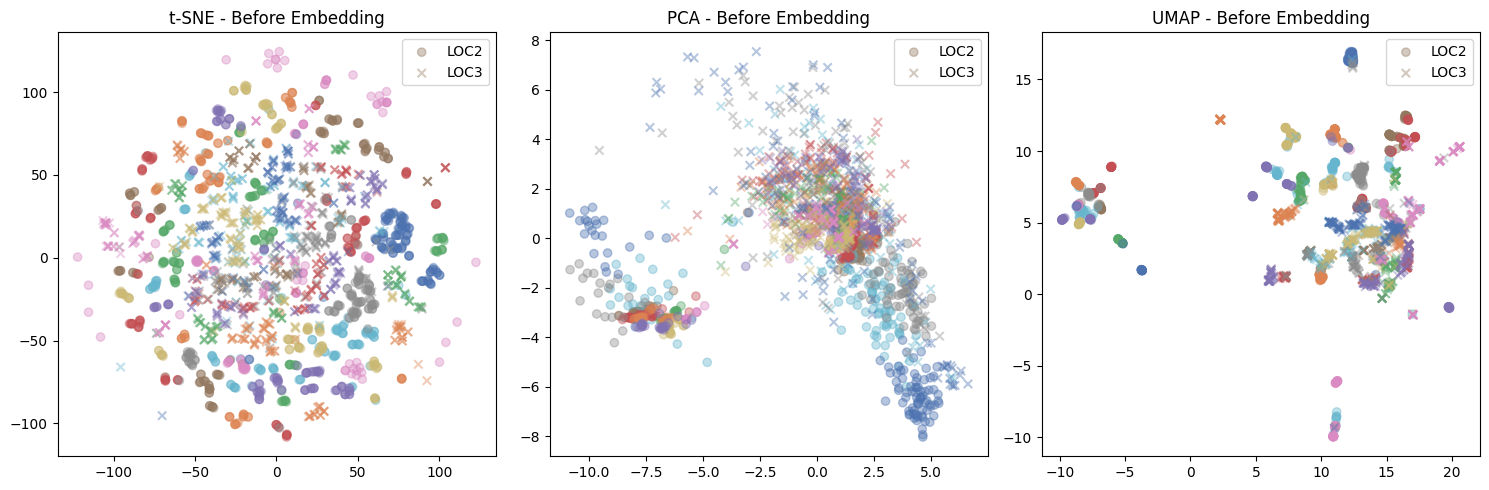

In [4]:
plt.figure(figsize=(15, 5))
i = 1
for reducer_name, reducer in reducers.items():
    embedding = reducer.fit_transform(pca_df.iloc[:, 2:])
    plt.subplot(1, len(reducers), i)
    plt_scatter_location(embedding, pca_df, pca_web_samples, locations[0], 'o')
    plt_scatter_location(embedding, pca_df, pca_web_samples, locations[1], 'x')
    i += 1
    plt.legend()
    plt.tight_layout()
    plt.title(f"{reducer_name} - Before Embedding")
plt.show()


I0000 00:00:1733373928.903918  678857 cuda_dnn.cc:529] Loaded cuDNN version 90300


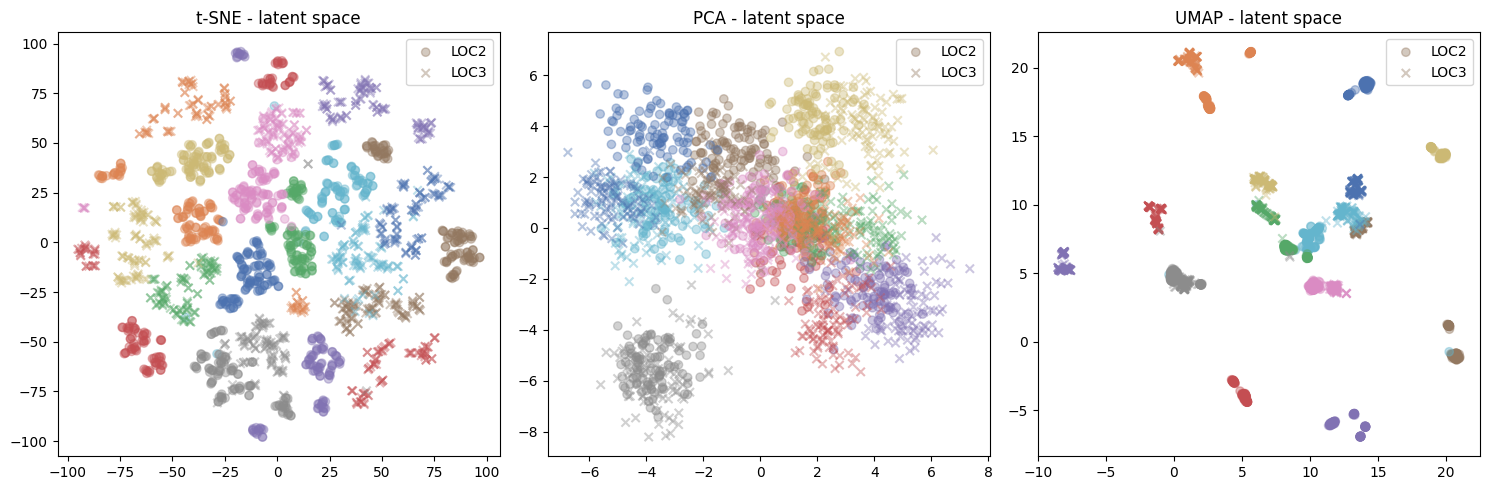

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap
import random

plt.figure(figsize=(15, 5))
i = 1
for reducer_name, reducer in reducers.items():
    embedding = reducer.fit_transform(get_latent_z(pca_df.iloc[:, 2:]))
    plt.subplot(1, len(reducers), i)
    plt_scatter_location(embedding, pca_df, pca_web_samples, locations[0], 'o')
    plt_scatter_location(embedding, pca_df, pca_web_samples, locations[1], 'x')
    i += 1
    plt.legend()
    plt.tight_layout()
    plt.title(f"{reducer_name} - latent space")
plt.show()

In [ ]:
from scripts.train_vae import filter_and_sort_data
# LOC1_embeddings = get_latent_z(filter_and_sort_data(train_df, 'LOC1'))
LOC2_embeddings = get_latent_z(filter_and_sort_data(train_df, 'LOC2'))

# L2 norm distribution

0.756231 0.7293882 2.641444 0.17372929 0.22782663


KeyboardInterrupt: 

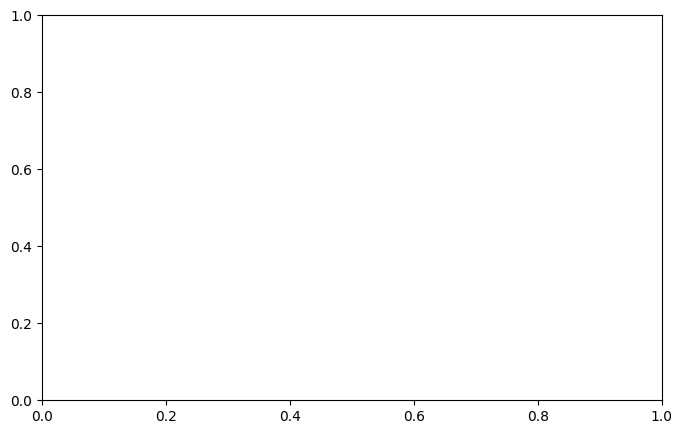

In [11]:
import numpy as np
import matplotlib.pyplot as plt


norms_LOC2 = tf.reduce_mean(tf.square(LOC2_embeddings), axis=1)
#  Compute statistics
mean = np.mean(norms_LOC2)
median = np.median(norms_LOC2)
max_val = np.max(norms_LOC2)
min_val = np.min(norms_LOC2)
std_dev = np.std(norms_LOC2)

# Display statistics
print(mean, median, max_val, min_val, std_dev)

# Plotting the boxplot for norms_LOC2
plt.figure(figsize=(8, 5))
plt.boxplot(norms_LOC2, vert=False, patch_artist=True, widths=0.7)
plt.title("Box Plot of Norms for LOC2 Embeddings")
plt.xlabel("Norm Value")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Magnitude Loss

In [14]:
import numpy as np
import matplotlib.pyplot as plt


magnitude_LOC2 = tf.abs(tf.reduce_sum(tf.square(LOC2_embeddings)) - tf.cast(tf.shape(LOC2_embeddings)[1], tf.float32))
#  Compute statistics
mean = np.mean(magnitude_LOC2)
median = np.median(magnitude_LOC2)
max_val = np.max(magnitude_LOC2)
min_val = np.min(magnitude_LOC2)
std_dev = np.std(magnitude_LOC2)

# Display statistics
print(mean, median, max_val, min_val, std_dev)

5807823.0 5807823.0 5807823.0 5807823.0 0.0


In [ ]:
def compute_kl_regularization(self, z):
    """Compute KL divergence loss to ensure latent space follows Gaussian distribution"""
    
    mean_sq = tf.reduce_mean(tf.square(z))
    log_var = tf.math.log(tf.math.reduce_variance(z) + self.epsilon)
    
    kl_loss = 0.5 * tf.reduce_mean(
        mean_sq + tf.exp(log_var) - 1 - log_var
    )
    return kl_loss

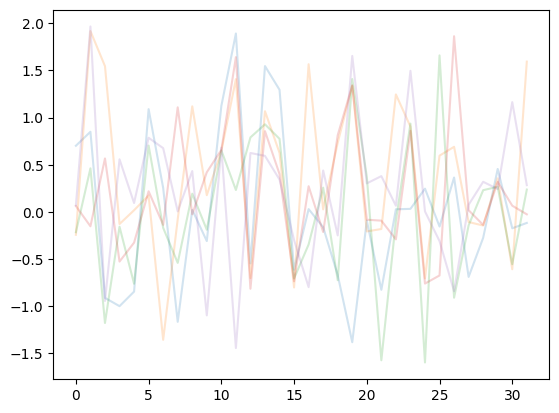

In [12]:
plt.figure()
for i in range(5):
    plt.plot(LOC2_embeddings[i], alpha=0.2)
plt.show()
plt.close()

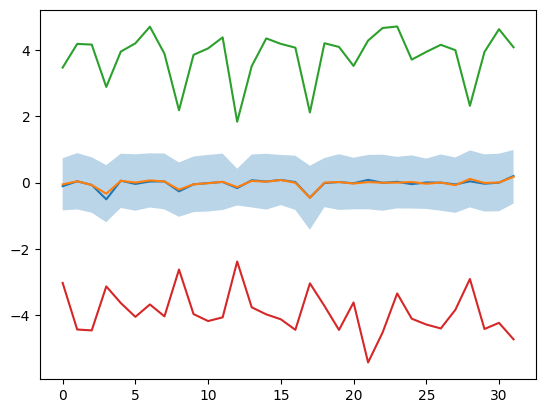

In [13]:
plt.figure()
std = np.std(LOC1_embeddings, axis=0)
mean = np.mean(LOC1_embeddings, axis=0)
plt.plot
plt.plot(np.median(LOC1_embeddings, axis=0), label='median')
plt.plot(mean, label='mean')
plt.plot(np.max(LOC1_embeddings, axis=0), label='max')
plt.plot(np.min(LOC1_embeddings, axis=0), label='min')
plt.fill_between(range(32), mean - std, mean + std, alpha = 0.3)
plt.show()
plt.close()

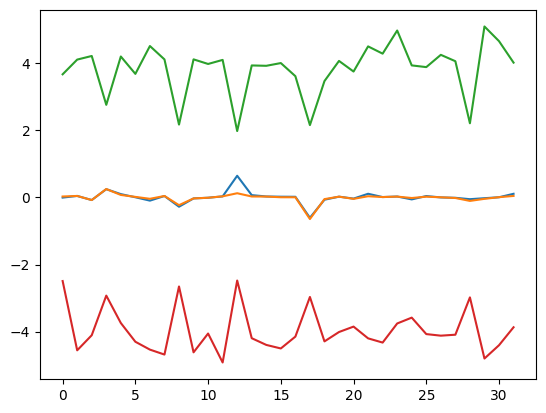

In [11]:
plt.figure()

plt.plot
plt.plot(np.median(LOC2_embeddings, axis=0), label='median')
plt.plot(np.mean(LOC2_embeddings, axis=0), label='mean')
plt.plot(np.max(LOC2_embeddings, axis=0), label='max')
plt.plot(np.min(LOC2_embeddings, axis=0), label='min')
plt.show()
plt.close()

# Different Time Frames

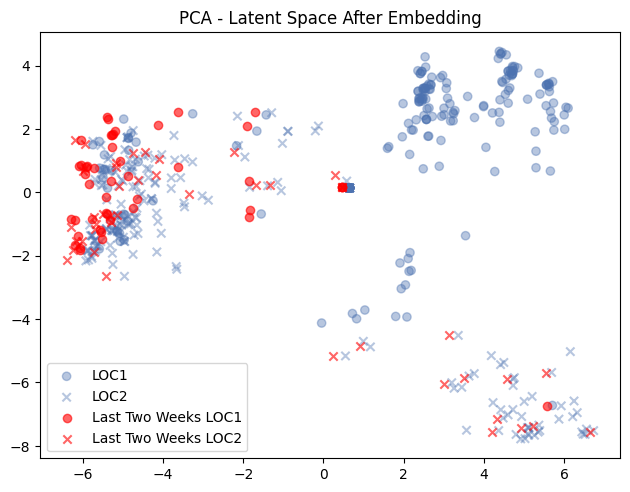

In [ ]:
# selected_website = random.sample(test_web_samples, 1)[0]
# selected_df = test_df[test_df['Website'] == selected_website]


# time_frame_df = pd.read_csv("../dataset/processed/LOC1-LOC2-scaled-balanced-10-25-to-11-08.csv")
# selected_website_in_time_frame_df = time_frame_df[(time_frame_df['Website'] == selected_website)]




# plt.figure()
# reducer = reducers['PCA']
# embedding = reducer.fit_transform(selected_df.iloc[:, 2:])
# time_embedding_LOC1 = reducer.transform(selected_website_in_time_frame_df[selected_website_in_time_frame_df['Location'] == 'LOC1'].iloc[:, 2:])
# time_embedding_LOC2 = reducer.transform(selected_website_in_time_frame_df[selected_website_in_time_frame_df['Location'] == 'LOC2'].iloc[:, 2:])
# plt_scatter_location(embedding, selected_df, [selected_website], 'LOC1', 'o')
# plt_scatter_location(embedding, selected_df, [selected_website], 'LOC2', 'x')
# plt.scatter(time_embedding_LOC1[:, 0], time_embedding_LOC1[:, 1], c='r', marker='o', label='Last Two Weeks LOC1', alpha=0.6)
# plt.scatter(time_embedding_LOC2[:, 0], time_embedding_LOC2[:, 1], c='r', marker='x', label='Last Two Weeks LOC2', alpha=0.6)
# plt.legend()
# plt.tight_layout()
# plt.title(f"PCA - Latent Space After Embedding")
# plt.show()
